<a href="https://colab.research.google.com/github/undercoverprincess13/DBSCAN/blob/main/NumPy_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python basics with NumPy
by [Ruben Nuredini](mailto:Ruben.Nuredini@hs-heilbronn.de), [Nicolaj Stache](mailto:Nicolaj.Stache@hs-heilbronn.de), [Andreas Schneider](mailto:Andreas.Schneider@hs-heilbronn.de), Heilbronn University of Applied Sciences

NumPy is the fundamental package for scientific computing with Python. It includes a powerful N-dimensional array object as well as linear algebra and random number capabilities that are useful for data science. NumPy also provides sophisticated (broadcasting) functions out-of-the box. NumPy is maintained by a large community (http://www.numpy.org). Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html).

[Matplotlib](https://matplotlib.org/) is a 2D plotting library for Python and NumPy. Matplotlib collection `matplotlib.pyplot` is a collection of command style functions.

As NumPy is a library, it has to be included using the `import` keyword.

In [1]:
import numpy as np

Additionally the `matplotlib.pyplot` should be imported. The `%matplotlib` is a [magic function](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) in IPython (the engine Jupyter notebooks run on). '%matplotlib inline' sets the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Basic data structures with NumPy

NumPy provides a very convenient way to create N-dimensional arrays. The data structures used in NumPy to represent these shapes (vectors, matrices...) are called numpy arrays.

### 0 - dimensional Array (Scalar)

In [3]:
x = np.array(42) ## Diese Zeile erstellt ein NumPy-Array namens x und weist ihm den Wert 42 zu.
## np.array() ist eine Funktion aus der NumPy-Bibliothek, die verwendet wird, um Arrays zu erstellen.
print("x: ", x)
print("The type of x: ", type(x))
print("The dimension of x:", np.ndim(x)) ## Diese Zeile gibt die Dimension von x aus, also 0. Das bedeutet, dass x ein skalarer Wert ist (ein Wert ohne Dimensionen).

x:  42
The type of x:  <class 'numpy.ndarray'>
The dimension of x: 0


### 1 - dimensional Array (Vector)

In [64]:
F = np.array([[5, 1, 4, 2, 6, 0]], dtype=np.double) # the dtype parameter can be used to define the type of the array elements. dimension in storage is 2
V = np.array([1., 2., 3., 4., 5., 6.]) # if the dtype parameter is omitted Python deduces the elements type. dimension in storage is 1
print("F: ", F)
print("V: ", V)
print("Type of F: ", F.dtype)
print("Type of V: ", V.dtype)
print("Dimension of F: ", np.ndim(F))
print("Dimension of V: ", np.ndim(V))


F:  [[5. 1. 4. 2. 6. 0.]]
V:  [1. 2. 3. 4. 5. 6.]
Type of F:  float64
Type of V:  float64
Dimension of F:  2
Dimension of V:  1


Let us check the type of F.

In [5]:
type(F)

numpy.ndarray

#### Shape
A very common NumPy function used in deep learning is [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html). It is used to get the shape (dimension) of the matrix/vector X and Y.

In [6]:
print("Shape of F: ", F.shape) ## (1,6)
print("Shape of V: ", V.shape) ## (6,) (length of vector is 6)

Shape of F:  (1, 6)
Shape of V:  (6,)


#### Transpose
Transposing data structures with [np.T](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html) is another common function in NumPy used in deep learning. Pay attention on what happens when we try to transpose the vector V.

In [7]:
F_transposed = F.T
V_transposed = V.T

In [12]:
print('F_transposed: \n', F_transposed)
print('Shape of F_transposed: ', F_transposed.shape)
print()
print('Shape of F: ',F)
print('Shape of F: ',F.shape)
print()
print('V_transposed: \n', V_transposed)  ## hier kann man nicht transponieren, weil wir oben nur eine Dimension gespeichert haben und dann die transponation nicht geht
print('Shape of V_transposed: ', V_transposed.shape)
print()
print('Shape of V: ',V)
print('Shape of V: ',V.shape)

F_transposed: 
 [[5.]
 [1.]
 [4.]
 [2.]
 [6.]
 [0.]]
Shape of F_transposed:  (6, 1)

Shape of F:  [[5. 1. 4. 2. 6. 0.]]
Shape of F:  (1, 6)

V_transposed: 
 [1. 2. 3. 4. 5. 6.]
Shape of V_transposed:  (6,)

Shape of V:  [1. 2. 3. 4. 5. 6.]
Shape of V:  (6,)


Please note: The orientation of a vector (column-vector or row-vector) is not stored in NumPy, as you can observe from `V` and `V_transposed`. Hence, transposition does not work as you might expect. It differs from the behavior of MATLAB, which internally treats vectors as matrices (with two dimensions) and can by this represent row and column vectors.

One approach for Python is to define vectors also as a two dimensional matrix, by using double brackets `[[ ]]`, as done for `F`. This is the recommended solution.

As an alternative, you can transpose a vector like this:

In [65]:
V_transposed2 = V[:,None]   ## if vector is already given and in one dimensional data structure, we can transform it like that:
print('V_transposed2: \n', V_transposed2)
print('Shape of V_transposed2: ', V_transposed2.shape)

## [:,None] fügt dem Array V eine neue Dimension hinzu und transformiert es dadurch von einem eindimensionalen Vektor in einen zweidimensionalen Spaltenvektor.
## ':' wählt alle Elemente von V aus.
## 'None' fügt eine neue Achse (Dimension) für die Spalten hinzu.
## Dadurch wird der ursprüngliche Vektor V zu einer einzelnen Spalte in einem neuen zweidimensionalen Array.

V_transposed2: 
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]
Shape of V_transposed2:  (6, 1)


#### Lists vs numpy.ndarray
The type of a regular Python array is `list` whereas the regular type of a NumPy array is `numpy.ndarray`. You can easily create a NumPy array out of a list

In [14]:
# list of room temperatures in centigrades
C = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]

# numpy array created from that list
C_np = np.array(C)

Now let's do computations with both - like doing a conversion of degree centigrade to degree fahrenheit, using this formula: $$ \vartheta(°F) = \vartheta(°C) \cdot 9/5 + 32$$

In case of a numpy array, we can make use of scalar-matrix computations...

In [15]:
# numpy supports matrix and vector algebra, hence the conversion is quite simple
print('Temperature in °F: ', C_np * 9/5 + 32) ## treats is element by element

Temperature in °F:  [68.18 69.44 71.42 72.5  72.86 72.14 71.24 70.16 69.62 68.18]


> **Task:** as a revision to lists... please implement the same conversion without numpy by using lists only (hint: consider list comprehensions)

In [16]:
## TODO: Implement the same conversion by using the list only.

ergebnis= [x*9/5+32 for x in C]
print(ergebnis)


[68.18, 69.44, 71.42, 72.5, 72.86, 72.14, 71.24000000000001, 70.16, 69.62, 68.18]


Other operations on numpy arrays are described later in the tutorial

<font color='blue'>

---


**Summary**:
- the type of a regular Python array is `list` whereas of a NumPy array is `numpy.ndarray`
- Make sure that you keep track of the dimensions of the data structures you create with NumPy.
- Many bugs in deep learning implementations are caused by improper shapes.
- A good practice is to define one-dimensional arrays in a full-fledged way (in fact, as a two dimensional array, like `F` was created).

### Two and higher dimensional arrays (Matrices, Tensors)

Let us create a two-dimensional matrix of shape 6x6.

In [66]:
Z = np.array([[3, 0, 1, 2, 7, 4],
              [1, 5, 8, 9, 3, 1],
              [2, 7, 2, 5, 1, 3],
              [0, 1, 3, 1, 7, 8],
              [4, 2, 1, 6, 2, 8],
              [2, 4, 5, 2, 3, 9]], np.double)
print (Z)

[[3. 0. 1. 2. 7. 4.]
 [1. 5. 8. 9. 3. 1.]
 [2. 7. 2. 5. 1. 3.]
 [0. 1. 3. 1. 7. 8.]
 [4. 2. 1. 6. 2. 8.]
 [2. 4. 5. 2. 3. 9.]]


In [67]:
print (Z.shape) # the first dimension of Z is now 6. -> (6,6)
print (Z.shape[0])
print (Z.shape[1])
 ## each dimension of a multidimensional array can be obtained separately. Dimension an stelle 1 (0) -> 6; Dimension an Stelle 2 (1) -> 6

(6, 6)
6
6


You can also create NumPy arrays in higher dimensions. Let us create a 3-D NumPy array.

In [68]:
highDimArray = np.array([
    [[0.00, 0.01, 0.02],
     [0.10, 0.11, 0.12],
     [0.20, 0.21, 0.22]],

    [[1.00, 1.01, 1.02],
     [1.10, 1.11, 1.12],
     [1.20, 1.21, 1.22]],

    [[2.00, 2.01, 2.02],
     [2.10, 2.11, 2.12],
     [2.20, 2.21, 2.22]]
])

In [20]:
highDimArray.shape

(3, 3, 3)

Accessing elements in a multidimensional array is by using its indices.

In [21]:
highDimArray[0] #using one index returns a 2-D NumPy array. ## of the first Matrix?

array([[0.  , 0.01, 0.02],
       [0.1 , 0.11, 0.12],
       [0.2 , 0.21, 0.22]])

In [22]:
highDimArray[1, 0] #using two indices returns a 1-D NumPy array.

array([1.  , 1.01, 1.02])

In [23]:
highDimArray[2, 2, 1] #three indices result with a scalar value.

np.float64(2.21)

---

## Initialization of NumPy vectors and matrices

A very convenient functions for quick initialization of NumPy arrays are:
- [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) that returns a new array of given shape and type, filled with zeros.
- [np.random.rand](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) that creates an array of the given shape and populate it with random samples from a uniform distribution over $[0, 1)$

These functions are very useful when it comes to the initialization of the parameters (weights and biases) in a neural network.

#### Zero initialization
A typical usage of `np.zeros` is as follows

In [24]:
np.zeros ((2, 5, 6))

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

Let us say that the $L$-th layer in a neural network consists of 10 neurons. Each of them is associated with a bias. In order to initialize the `b_L` vector to zeros we could use:

In [25]:
layer_L_dims = 10
b_L = np.zeros((layer_L_dims, 1))
print (b_L)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


#### Random Initialization

A typical usage of `np.random.rand` is as follows

In [26]:
np.random.rand(7, 4)

array([[0.10215603, 0.75031694, 0.23648424, 0.47032832],
       [0.25536484, 0.57683173, 0.00401233, 0.34976743],
       [0.54818805, 0.53189272, 0.77905577, 0.66554922],
       [0.28944977, 0.71685005, 0.31950218, 0.77223748],
       [0.66660456, 0.75984832, 0.03906393, 0.64358454],
       [0.46542143, 0.03439796, 0.84142205, 0.09465375],
       [0.13379774, 0.8537174 , 0.34580056, 0.28681632]])

The usage of an equal seed makes sure your "random" numbers will be the same as ours. Running the code several times gives you always the same values.

In [27]:
np.random.seed(1)
np.random.rand(4, 3)

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01, 3.96767474e-01],
       [5.38816734e-01, 4.19194514e-01, 6.85219500e-01]])

## Linear Algebra fundamentals with NumPy

Linear algebra is the branch of mathematics concerning linear equations such as linear functions such as
and their representations through matrices and vector spaces. Linear algebra is particularly useful in deep learning as it provides efficiency in terms of calculation speed and simplicity in coding. By employing linear algebra operations the amount of loops (`for`, `while` constructs) is decreased to minimum.

> **Task**: Examine the following code snippets and explain them to your neighbor!

In [28]:
arr1 = [1, 2, 3, 4]
arr2 = [5, 6, 7, 8]

In [36]:
# Multiplication of two python arrays with a loop
product = []
for i in range(len(arr1)):
    product.append(arr1[i] * arr2[i])
product

[5, 12, 21, 32]

One remark: The code above, might be the most obvious solution to the problem using lists. However, it is surely not the most Pythonic way of implementing this. A better approach in this sense uses list comprehensions with the `zip` command. Please check the explanation and other examples for this [here](https://www.programiz.com/python-programming/methods/built-in/zip).

In [30]:
product = [x*y for x, y in zip(arr1, arr2)]
print(product)

[5, 12, 21, 32]


However, multiplying two vectors seems to be complex using lists. With NumPy the same result can be achieved by:

In [31]:
# Linear algebra version by employing NumPy
np.array(arr1) * np.array(arr2)

array([ 5, 12, 21, 32])

### Matrix Multiplication

Multiplication of matrix to a scalar is done by multiplying each element of the matrix to the scalar.

In [32]:
A = np.random.randint(11, size=(3, 4)) # Generate a 3 x 4 matrix of ints between 0 (inclusive) and 11 (exclusive):
print ('The original values of the matrix: ')
print(A)
print ('The values of the matrix scaled by 2: ')
print (A * 2)

The original values of the matrix: 
[[10  2  4  7]
 [ 7  9  1  7]
 [ 0  6  9  9]]
The values of the matrix scaled by 2: 
[[20  4  8 14]
 [14 18  2 14]
 [ 0 12 18 18]]


Multiplying a matrix by a matrix is tricky as not every two matrices can be multiplied. If $A$ is an $n × m$ matrix and $B$ is an $m × p$ matrix, their matrix product $AB$ is an $n × p$ matrix. The $m$ entries across a row of $A$ are multiplied with the $m$ entries down a column of $B$ and summed to produce an entry of $AB$.

The matrix multiplication can be done by the @ operator.

In [33]:
print (A)
print ('The shape of the matrix A is', A.shape)

[[10  2  4  7]
 [ 7  9  1  7]
 [ 0  6  9  9]]
The shape of the matrix A is (3, 4)


In [34]:
B = np.random.randint(11, size=(4, 5))
print (B)
print ('The shape of the matrix B is', B.shape)

[[ 7  6  9  1  0]
 [ 1  8  8  3 10]
 [ 9  8  7  3  6]
 [ 5  1  9  3  4]]
The shape of the matrix B is (4, 5)


In [35]:
AB = A @ B
print (AB)
print ('The shape of the matrix AB is', AB.shape)

[[143 115 197  49  72]
 [102 129 205  58 124]
 [132 129 192  72 150]]
The shape of the matrix AB is (3, 5)


The attempt to obtain the product BA will result with an error. Why?

In [37]:
BA = B @ A ## because the dimensions don't match

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

### Dot Product

One very important vector operation is the dot product. The dot product is the multiplication of two vectors and results with a scalar.

In [38]:
w = np.random.randn(4, 1)
w

array([[-0.74362701],
       [-0.43712177],
       [-0.42645009],
       [ 1.3814073 ]])

In [39]:
data_point = np.array([[1, 1, 2, 0]]).T
data_point

array([[1],
       [1],
       [2],
       [0]])

In [40]:
np.dot(w.T, data_point)

array([[-2.03364897]])

In deep learning usually the datasets are represented as groups of datapoints. The dot product is very helpful when each of the datapoints in the dataset should be multiplied by weights which are stored in a vector $w$.

In [41]:
# an imaginary dataset of 10 data points each represented as a 4 x 1 vector.
data_set = np.random.randint(3, size=(4, 10))
data_set

array([[1, 2, 0, 0, 1, 2, 2, 1, 0, 2],
       [1, 2, 1, 0, 1, 1, 2, 0, 0, 2],
       [2, 1, 0, 2, 2, 2, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 2, 0, 1, 2, 2]])

In [42]:
# the result is a 1 x 10 vector where the elements correspond to the product of each datapoint and the weights vector.
Z = np.dot(w.T, data_set)
Z

array([[-0.65224167, -2.78794766, -0.43712177,  0.52850712, -0.65224167,
        -0.01446137, -2.36149757,  0.63778029,  2.33636451, -0.02513306]])

### Elementwise operation

There is sometimes the need for elementwise algebraic operation. Elementwise operations are binary operations that take two matrices of the same dimensions, and produce another matrix where each element $(i,j)$ is the operation of elements $(i,j)$ of the original two matrices. Some of the NumPy functions for element-wise operations are:
* [np.multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html), alternatively use `*` for multiplying arguments element-wise. This operation is also known as the **Hadamard product**.
* [np.divide](https://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html), alternatively use `/`  for dividing arguments element-wise.
* [np.add](https://docs.scipy.org/doc/numpy/reference/generated/numpy.add.html), alternatively use `+` for adding arguments element-wise.
* [np.subtract](https://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html), alternatively use `-` for subtracting arguments element-wise.
* [np.square](https://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html), alternatively use `**` return the element-wise square of the input.

Furthermore, there are logical operations avaliable:
* [np.logical_or](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_or.html#numpy.logical_or)
* [np.logical_and](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html#numpy.logical_and)
* [np.equal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.equal.html#numpy.equal) (alternatively use `==`)
* many more functions can be explored [here](https://docs.scipy.org/doc/numpy/reference/index.html)

A simple example is applying a filter(mask) on a matrix. A filter is applied in order to zero-out some elements of the matrix.

In [43]:
matrix = np.random.rand(4, 5) # creating a random 4 x 5 matrix of floating point numbers
mask = np.random.randint(2, size=(4, 5)) # creating a random 4 x 5 matrix of zeroes or ones

In [44]:
masked_matrix = np.multiply(matrix, mask) # the Hadmard product zeroes-out the elements corresponding to the zero positions in the mask
print (masked_matrix)

[[0.         0.58655504 0.90340192 0.         0.        ]
 [0.         0.39767684 0.         0.         0.        ]
 [0.         0.72599799 0.         0.         0.        ]
 [0.         0.26992789 0.89588622 0.         0.        ]]


In order to square all elements of the matrix the `np.squared` can be used:

In [45]:
np.square(masked_matrix)

array([[0.        , 0.34404682, 0.81613502, 0.        , 0.        ],
       [0.        , 0.15814687, 0.        , 0.        , 0.        ],
       [0.        , 0.52707307, 0.        , 0.        , 0.        ],
       [0.        , 0.07286107, 0.80261212, 0.        , 0.        ]])

### Broadcasting ####
A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Here are two examples to illustrate broadcasting:

In [47]:
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([1, 2, 3])

print(A * B) ## element wise multiplication also 1* das erste Element aus jeder klammer, 2* das zweite element usw
print()
print(A + B)

##broadcasting anschauen

[[11 24 39]
 [21 44 69]
 [31 64 99]]

[[12 14 16]
 [22 24 26]
 [32 34 36]]


In [ ]:
A = np.array([10, 20, 30])
B = np.array([1, 2, 3])
A[:, None] * B

> ** Task: Describe below what broadcasting does **

##

Todo

### Example: Normalizing a Dataset

Element-wise operations are useful for normalizing input data. Normalizing data is one of the techniques to speed-up the learning process when training a neural network. It consists of two steps:
* Subtract-out the mean $\mu$
* Normalize the variances $\sigma$

Let us have a look at a imaginary training set $X$ with two input features $\begin{bmatrix} x_1\\x_2\end{bmatrix}$.

In [49]:
m = 40 # number of training examples
np.random.seed(4)
x1 = np.random.uniform(low=1.0, high=5.0, size=m) # values of feature x1 are between 1 and 5
x2 = np.random.uniform(low=2.0, high=3.0, size=m) # values of feature x2 are between 2 and 3
X = np.array([x1, x2])

In [50]:
print (X)

[[4.86811936 3.188929   4.89073744 3.85926397 3.7909153  1.86435798
  4.90509782 1.02492102 2.01192945 2.73916613 4.11753169 1.7907403
  4.45197294 4.93360271 1.65536897 3.38933578 1.03594439 2.54628513
  1.17664023 4.82661187 2.74458659 4.79590923 4.14522394 4.46515719
  1.69266169 1.29979435 3.40297089 1.67188873 3.93352067 2.63377544
  3.11163529 4.75028634 3.08678449 1.43277353 1.63289363 3.18081061
  3.09761632 3.55044098 2.60598177 3.59922044]
 [2.3969     2.62391611 2.76740497 2.17897391 2.37557577 2.50253306
  2.68666708 2.25367965 2.55474086 2.62493084 2.89550117 2.36285359
  2.63755707 2.1914464  2.49779411 2.1824454  2.91838304 2.43182207
  2.8301881  2.4167763  2.90466759 2.40482522 2.3311745  2.57213877
  2.84544365 2.86101431 2.59568812 2.08466161 2.59726661 2.24545371
  2.73259345 2.89465129 2.51473397 2.60356351 2.06506781 2.54007473
  2.12918678 2.61456285 2.36365035 2.76775803]]


In [51]:
# A helper function for plotting the dataset as a scatter plot
def plotting_helper(X, scale):
    plt.ylim((-scale, scale)) # setting the range of the plotted y-axis
    plt.xlim((-scale, scale)) # setting the range of the plotted x-axis
    plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
    plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
    return plt.scatter(X[0], X[1])

#### Graphical representation of the data in X

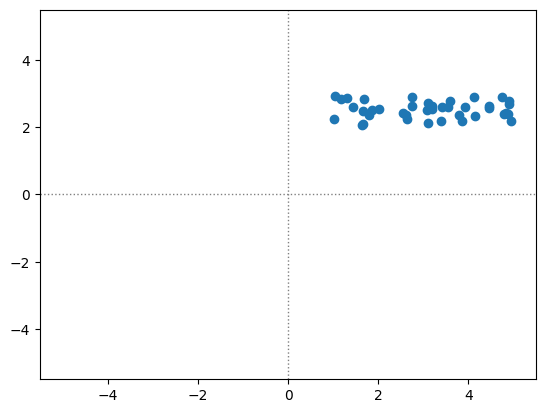

In [52]:
plotting_helper(X, 5.5)

The mean can be calculated as: $$\mu = \frac{1}{m} {\sum_{i=1}^{m}x}$$
and then subtracted out of each element of the corresponding feature:
$$x := x - \mu$$

In [53]:
mu_x1 = np.sum(x1) / m # calculate the mean of the x1 feature
mu_x2 = np.sum(x2) / m # calculate the mean of the x2 feature


np.testing.assert_allclose(mu_x1, np.mean(x1), rtol=1e-5, atol=0)
np.testing.assert_allclose(mu_x2, np.mean(x2), rtol=1e-5, atol=0)

x1_new = x1 - mu_x1
x2_new = x2 - mu_x2
X_new = np.array([x1_new, x2_new])

#### Graphical representation of the data in X after subtracting the mean

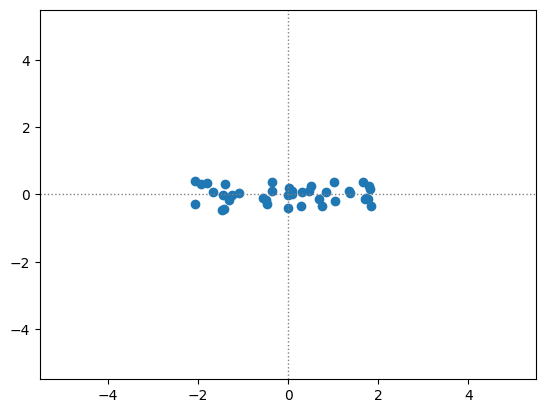

In [54]:
plotting_helper(X_new, 5.5)

Our training set has now (almost) zero-mean over both features.

In [55]:
print(X_new.mean(axis=1))

[1.33226763e-16 3.33066907e-17]


The next step is to normalize the variances. It is obvious that the feature $x_1$ has much larger variance than the feature $x_2$. In order to do so:

For our distribution with zero-mean, the variance can be calculated as: $$\sigma^{2} = \frac{1}{m} {\sum_{i=1}^{m}x^{2}}$$
and then each element of the features should be divided by the corresponding variance :
$$x := \frac{x}{\sigma}$$

In [56]:
sigma_x1 = np.sum(np.square(x1_new)) / m # calculate the mean of the x1 feature
sigma_x2 = np.sum(np.square(x2_new)) / m # calculate the mean of the x2 feature

np.testing.assert_allclose(sigma_x1, np.var(x1_new), rtol=1e-5, atol=0)
np.testing.assert_allclose(sigma_x2, np.var(x2_new), rtol=1e-5, atol=0)

x1_norm = x1_new / np.sqrt(sigma_x1)
x2_norm = x2_new / np.sqrt(sigma_x2)
X_norm = np.array([x1_norm, x2_norm])

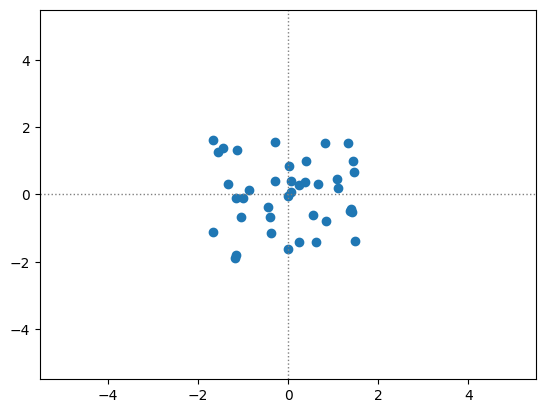

In [57]:
plotting_helper(X_norm, 5.5)  ## divided by the square root of sigma <- standard diviasion

The variances of both $x_1$ and $x_2$ are now equal to 1.

In [58]:
print(X_norm.std(axis=1))

[1. 1.]


Another way to calculate the norm is by employing element-wise operations

In [59]:
X_squared = np.square(X_new) # element-wise squaring of all elements of the dataset
sum_X = np.sum(X_squared, axis=1) # summing all elements per row
sigmas_X = np.divide(sum_X , m) # dividing the sums by m
sigmas_X = np.expand_dims(sigmas_X, axis=1) # reshaping the result with aditional axis - from (2,) to  (2, 1)

X_norm_easy = np.divide(X_new, np.sqrt(sigmas_X)) # perform the element-wise division

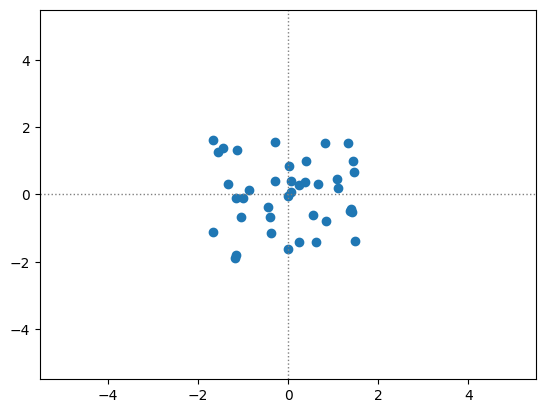

In [60]:
plotting_helper(X_norm_easy, 5.5)

The variances of both $x_1$ and $x_2$ are again equal to 1.

In [61]:
print(X_norm_easy.std(axis=1))

[1. 1.]


Machine learning tools such as `sklearn` provide normalizing functions that let you apply various normalizations.

In [62]:
from sklearn.preprocessing import scale

[1. 1.]


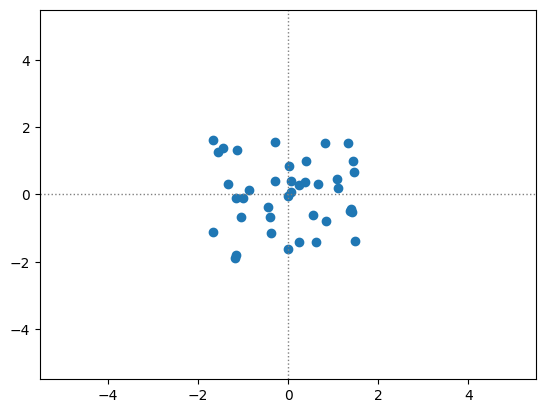

In [63]:
normed_matrix = scale(X, axis=1)
plotting_helper(normed_matrix, 5.5)
print(normed_matrix.std(axis=1)) # the sum of the normalized features should be 1.

<font color='blue'>
**Important notice**:
- keep track of the dimensions of the data structures in NumPy when calculating matrix and dot product.
- in order to perform elementwise operations, the sizes of the NumPy arrays must be identical.

# More Information
* https://www.python-kurs.eu
* https://matplotlib.org/users/pyplot_tutorial.html

# Media
http://neuralnetworksanddeeplearning.com/images/tikz11.png

# References

[1] @article{DBLP:journals/corr/HeZRS15,
  author    = {Kaiming He and
               Xiangyu Zhang and
               Shaoqing Ren and
               Jian Sun},
  title     = {Deep Residual Learning for Image Recognition},
  journal   = {CoRR},
  volume    = {abs/1512.03385},
  year      = {2015},
  url       = {http://arxiv.org/abs/1512.03385},
  archivePrefix = {arXiv},
  eprint    = {1512.03385},
  timestamp = {Wed, 07 Jun 2017 14:41:17 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/HeZRS15},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}